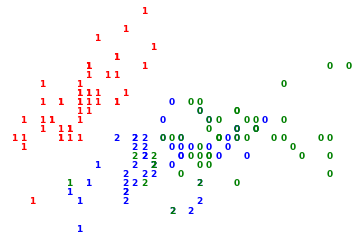

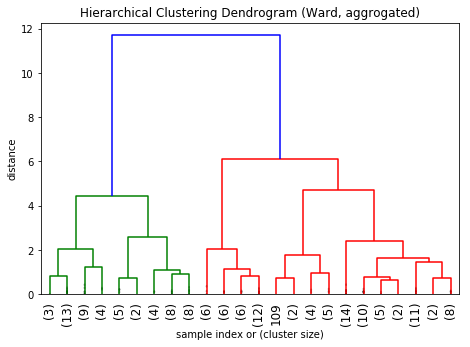

In [2]:
#import the required packages
import os
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import datasets
#load the iris dataset
iris = datasets.load_iris()
feat = iris.feature_names
#take only 2 features
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
#set the target label
y = iris.target
y_name = ['Setosa', 'Versicolour', 'Virginica']

#agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(X);

# MinMax scale the data so that it fits nicely onto the 0.0->1.0 axes of the plot.
from sklearn import preprocessing
X_plot = preprocessing.MinMaxScaler().fit_transform(X)

Z = linkage(X, 'ward')
colours = 'rbg'
for i in range(X.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

#plotting 
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
figure = plt.figure(figsize=(7.5, 5))
#dendrogram representation
Z = linkage(X, 'ward')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
#plotting parameters
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()